In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x, y), (x_test, y_test) = DataUtil.gen_noisy_linear(one_hot=False)
x_train, x_cv = x[:9000], x[9000:]
y_train, y_cv = y[:9000], y[9000:]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_losses(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, csl = nn.log["epoch_loss"], nn.log["cv_snapshot_loss"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(csl))
        plt.plot(ee_base, el, label="Train loss ({})".format(name))
        plt.plot(cse_base, csl, label="CV loss ({})".format(name))
        plt.legend()
    plt.show()

In [3]:
from _Dist.NeuralNetworks.c_BasicNN.NN import Basic

basic = Basic(x_train, y_train, x_cv, y_cv).fit()

Epoch    1   Iter    126   Snapshot      3 (acc)  -  Train : 0.892222   CV :     0.81  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter    252   Snapshot      6 (acc)  -  Train : 0.894444   CV :    0.836  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch   32   Iter   4074   Snapshot     97 (acc)  -  Train :      1.0   CV :    0.812  -  Extending n_epoch to 37
Epoch   37   Iter   4704   Snapshot    112 (acc)  -  Train :      1.0   CV :    0.808  -  Extending n_epoch to 42
Epoch   42   Iter   5376   Snapshot    128 (acc)  -  Train :      1.0   CV :    0.806  -  Extending n_epoch to 47
Epoch   47   Iter   6006   Snapshot    143 (acc)  -  Train :      1.0   CV :    0.806  -  Extending n_epoch to 52
Epoch   52   Iter   6636   Snapshot    158 (acc)  -  Train :      1.0   CV :    0.807  -  Extending n_epoch to 57
Epoch   57   Iter   7266   Snapshot    173 (ac

In [4]:
from _Dist.NeuralNetworks.e_AdvancedNN.NN import Advanced

numerical_idx = [True] * 100 + [False]
categorical_columns = []

In [5]:
wnd = Advanced(
    x_train, y_train, x_cv, y_cv, use_dndf=False, use_pruner=False,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns
).fit()

Epoch    1   Iter     84   Snapshot      2 (acc)  -  Train : 0.843333   CV :     0.81  -  Current run (2) leads to best result we've ever had, saving checkpoint since performance has improved significantly
Epoch    1   Iter    126   Snapshot      3 (acc)  -  Train : 0.883333   CV :    0.813  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter    252   Snapshot      6 (acc)  -  Train : 0.887778   CV :    0.819  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    3   Iter    378   Snapshot      9 (acc)  -  Train : 0.876667   CV :     0.82  -  Current run (9) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    4   Iter    504   Snapshot     12 (acc)  -  Train : 0.872222   CV :    0.828  -  Current run (12) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch   14   Iter   1680 

In [6]:
wnd_dndf = Advanced(
    x_train, y_train, x_cv, y_cv, use_dndf=True, use_pruner=False,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns
).fit()

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch    1   Iter    126   Snapshot      3 (acc)  -  Train : 0.885556   CV :    0.813  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter    252   Snapshot      6 (acc)  -  Train : 0.881111   CV :     0.82  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    3   Iter    378   Snapshot      9 (acc)  -  Train : 0.885556   CV :    0.822  -  Current run (9) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    4   Iter    504   Snapshot     12 (acc)  -  Train : 0.881111   CV :    0.826  -  Current run (12) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    8   Iter    924   Snapshot     22 (acc)  -  Train : 0.913333   CV :    0.833  -  Current run (22) leads to best result we've ever had, saving checkpoint since we've suffered from over-fitting
Epoch   11   Iter   1386   Sna

In [7]:
wnd_dndf_pruned = Advanced(
    x_train, y_train, x_cv, y_cv, use_dndf=True, use_pruner=True,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns
).fit()

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch    1   Iter    126   Snapshot      3 (acc)  -  Train : 0.897778   CV :    0.836  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter    252   Snapshot      6 (acc)  -  Train : 0.871111   CV :    0.837  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    3   Iter    378   Snapshot      9 (acc)  -  Train : 0.896667   CV :    0.841  -  Current run (9) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch   14   Iter   1680   Snapshot     40 (acc)  -  Train : 0.938889   CV :    0.828  -  Early stopped at n_epoch=14 due to 'Over-fitting'
  -  Rolling back to the best checkpoint
INFO:tensorflow:Restoring parameters from _Models\AdvancedNN_(256, 256)\tmp\Model
  -  Time Cost: 22.57480001449585


BasicNN              acc  -  Train : 0.924333   CV :    0.836   Test : 0.912667
WnD                  acc  -  Train : 0.880778   CV :    0.828   Test :    0.936
WnD & DNDF           acc  -  Train : 0.946556   CV :    0.837   Test : 0.932667
WnD & DNDF & Pruner  acc  -  Train : 0.877556   CV :    0.841   Test : 0.957333


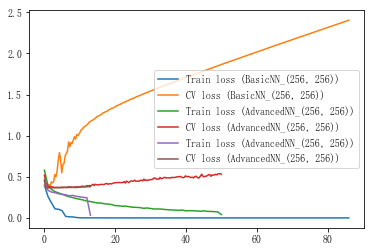

In [8]:
print("BasicNN              ", end="")
basic.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD                  ", end="")
wnd.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF           ", end="")
wnd_dndf.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF & Pruner  ", end="")
wnd_dndf_pruned.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
draw_losses(basic, wnd_dndf, wnd_dndf_pruned)